In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
all_df_raw = pd.merge(ride_df, city_df, on='city')
city_group = all_df_raw.groupby('city')
# city_df = pd.DataFrame({'City': city_group.count().index})
# Display the data table for preview
all_df_raw.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
len(all_df_raw.city.unique())

120

In [4]:
# city_group.mean()['fare']
# city_group.count()['ride_id']
# city_group.mean()['driver_count']
all_df = all_df_raw[['city', 'type']]

temp=pd.merge(pd.merge(pd.DataFrame(city_group.mean()['fare']),
                       pd.DataFrame(city_group.count()['ride_id']), on='city'), 
              pd.DataFrame(city_group.mean()['driver_count']), on='city')
temp.head()

all_df = pd.merge(all_df, temp, on='city')
all_df=all_df.drop_duplicates()
all_df=all_df[['city', 'fare','ride_id', 'driver_count', 'type']]
all_df.head()

,city,fare,ride_id,driver_count,type
0,Lake Jonathanshire,23.425833,24,5.0,Urban
24,South Michelleport,24.451613,31,72.0,Urban
55,Port Samanthamouth,25.642800,25,57.0,Urban
80,Rodneyfort,28.616957,23,34.0,Urban
103,South Jack,22.965263,19,46.0,Urban


In [5]:
all_df.shape

(120, 5)

In [6]:
all_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Bubble Plot of Ride Sharing Data

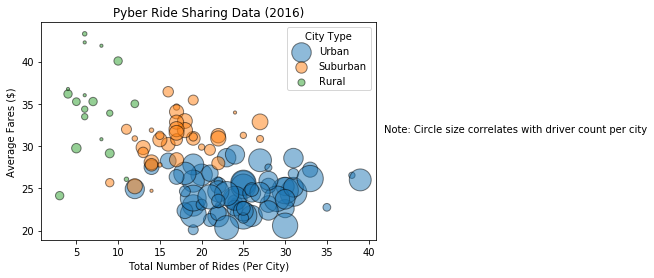

In [7]:
# Obtain the x and y coordinates for each of the three city types
for i in all_df.type.unique():
    plt.scatter(all_df[all_df.type == i]['ride_id'], all_df[all_df.type == i]['fare'], s=all_df[all_df.type == i]['driver_count']*10, alpha=0.5, label=i, edgecolor ='black')

# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
plt.legend(title='City Type')

# Incorporate a text label regarding circle size
plt.gcf().text(.92, 0.5, 'Note: Circle size correlates with driver count per city', fontsize=10)

# Save Figure
plt.savefig("Pyber_Ride_Sharing.png")

No handles with labels found to put in legend.


Help on Legend in module matplotlib.legend object:

class Legend(matplotlib.artist.Artist)
 |  Place a legend on the axes at location loc.
 |  
 |  Method resolution order:
 |      Legend
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, handles, labels, loc=None, numpoints=None, markerscale=None, markerfirst=True, scatterpoints=None, scatteryoffsets=None, prop=None, fontsize=None, borderpad=None, labelspacing=None, handlelength=None, handleheight=None, handletextpad=None, borderaxespad=None, columnspacing=None, ncol=1, mode=None, fancybox=None, shadow=None, title=None, framealpha=None, edgecolor=None, facecolor=None, bbox_to_anchor=None, bbox_transform=None, frameon=None, handler_map=None)
 |      Parameters
 |      ----------
 |      parent : `~matplotlib.axes.Axes` or `.Figure`
 |          The artist that contains the legend.
 |      
 |      handles : sequence of `.Artist`
 |          A list of Artists (lines, pa

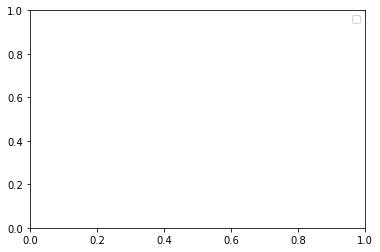

In [8]:
help(plt.legend())

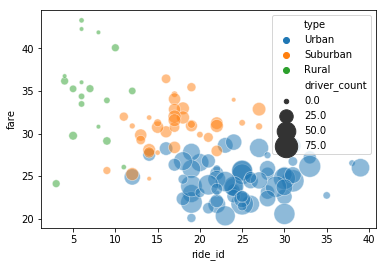

In [9]:
import seaborn as sns
sns.scatterplot(all_df['ride_id'], all_df['fare'], size=all_df['driver_count'], hue=all_df['type'], alpha=0.5, sizes=(20,500), legend='brief')

## Total Fares by City Type

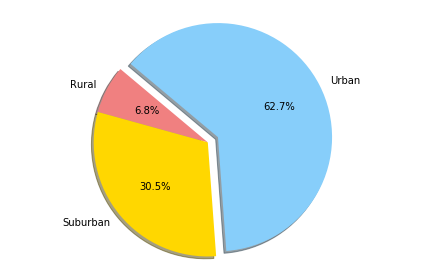

In [10]:
# Calculate Type Percents
fare_city = pd.DataFrame(all_df_raw.groupby('type').sum()['fare'])
fare_city['%'] = fare_city['fare']/fare_city['fare'].sum()*100
fare_city
# Build Pie Chart
plt.pie(fare_city['%'], explode=(0,0,0.1),labels = fare_city.index, colors = ['lightcoral', 'gold', 'lightskyblue'],shadow=True, autopct='%.1f%%', startangle=140)

plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("total_fares_by_city_type.png")

## Total Rides by City Type

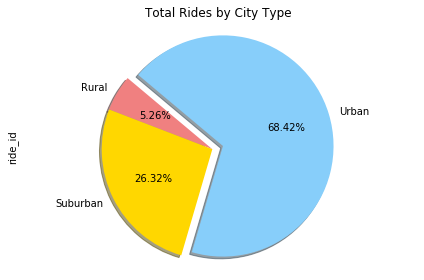

In [14]:
ride_city = all_df.copy()
data = ride_city.groupby('type').sum()['ride_id']/ride_city['ride_id'].sum()*100
# ride_city
# Build Pie Chart
# plt.pie(ride_city['%'], shadow=True)
data.plot(kind = 'pie', y = data.keys, explode=(0,0,0.1),autopct='%.2f%%',title='Total Rides by City Type', colors = ['lightcoral', 'gold', 'lightskyblue'],shadow= True,startangle=140, labels=data.index)
plt.tight_layout()
plt.axis('equal')

# Save Figure
plt.savefig("total_rides_by_city_type.png")

## Total Drivers by City Type

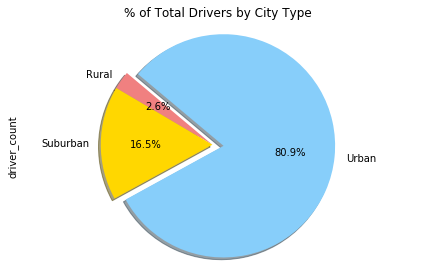

In [12]:
# Calculate Driver Percents
driver_city = all_df.copy()
driver_city.head()
data = driver_city.groupby('type').sum()['driver_count']/ride_city['driver_count'].sum()*100
# ride_city
# Build Pie Chart
# plt.pie(ride_city['%'], shadow=True)
data.plot(kind = 'pie', y = data.keys, autopct='%.1f%%', title='% of Total Drivers by City Type', colors = ['lightcoral', 'gold', 'lightskyblue'],shadow = True, explode=(0,0,0.1), startangle=140)
plt.tight_layout()
plt.axis('equal')
# Build Pie Charts

# Save Figure
plt.savefig("total_%drivers_by_city_type.png")